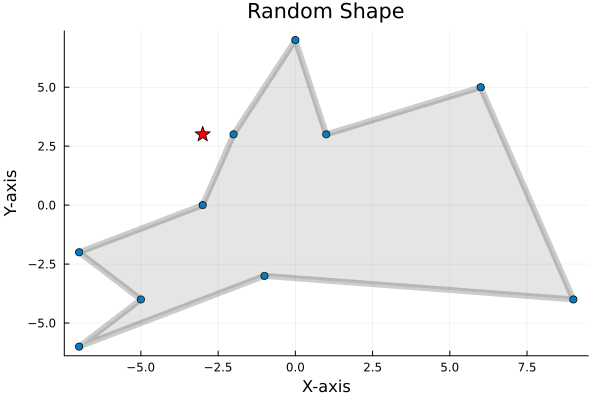

In [63]:
### generating the random shape and a point
using Plots

function generate_random_shape(n_points::Int)
    angles = sort(rand(n_points) .* 2π) #sorted random angles
    radius = rand(n_points)  # Random radius for the vertexes of the shape
    x = radius .* cos.(angles)
    y = radius .* sin.(angles)
    return x, y
end


n_points = 10 # Number of points
x, y = (generate_random_shape(n_points))
x=floor.(x.*10)
y=floor.(y.*10)


Plots.scatter(x, y, title="Random Shape", xlabel="X-axis", ylabel="Y-axis", legend=false, markersize=4)
plot!(x, y, seriestype=:shape, color=:gray, lw=6,  alpha=0.2)  # Connect the points to form the shape

points=[] ### vertexes of the polygon
for i in eachindex(x)
    push!(points, [x[i], y[i]])
end
points=Matrix(reduce(hcat, points)')

xp=rand(minimum(x):maximum(x))
yp=rand(minimum(y):maximum(y))
point=[xp, yp] ### the point to be checked
Plots.plot!([xp],[yp], ms=8, markershape=:star, color=:red)

In [64]:
point_in_polygon(point, points)

false

In [57]:
function point_in_polygon(point::AbstractVector{<:Real}, polygon_points::AbstractMatrix{<:Real})::Bool
    x, y = point
    n = size(polygon_points, 1)
    inside = false

    j = n
    for i in 1:n
        xi, yi = polygon_points[i, 1], polygon_points[i, 2]
        xj, yj = polygon_points[j, 1], polygon_points[j, 2]

        ### First exception
        # Check if point is on a vertex
        if (x == xi && y == yi) || (x == xj && y == yj)
            return true
        end

        ### second exception
        # Check if point is on an edge
        if (min(xi, xj) <= x <= max(xi, xj)) && (min(yi, yj) <= y <= max(yi, yj))
            if (yj - yi) * (x - xi) == (y - yi) * (xj - xi)
                return true
            end
        end

        # Ray-casting
        if ((yi > y) != (yj > y))
            intersect_x = (xj - xi) * (y - yi) / (yj - yi) + xi
            if x < intersect_x
                inside = !inside
            end
        end

        j = i
    end
    
    return inside
end

point_in_polygon (generic function with 1 method)